In [327]:
# 导入相关包

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
# 读入数据
data = pd.read_csv('/Users/fq/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# 查看数据集大小
data.shape

(7043, 21)

In [329]:
# 查看数据前五行
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [330]:
# 查看数据信息
data.info()
# 数据共21个特征，7043行，占用内存为1.1M
# 观察数据发现，TotalCharges’总消费额的数据类型为字符串，应该转换为浮点型数据。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [331]:
# data[['TotalCharges']].astype(float)
# ValueError: could not convert string to float:无法转换成浮点型数据

In [332]:
# 依次检查各个字段的数据类型、字段内容和数量。最后发现“TotalCharges”（总消费额）列有11个用户数据缺失。
# format函数为字符串的格式化函数
for x in data.columns:
    test = data.loc[:,x].value_counts()
    print('{0} 的行数是：{1}'.format(x,test.sum()))
    print('{0} 的数据类型是：{1}'.format(x,data[x].dtypes))
    print('{0} 的内容是：\n{1}\n'.format(x,test))

customerID 的行数是：7043
customerID 的数据类型是：object
customerID 的内容是：
8294-UIMBA    1
3177-LASXD    1
9681-KYGYB    1
1591-MQJTP    1
2929-ERCFZ    1
             ..
5351-QESIO    1
8541-QVFKM    1
9103-CXVOK    1
8165-CBKXO    1
4134-BSXLX    1
Name: customerID, Length: 7043, dtype: int64

gender 的行数是：7043
gender 的数据类型是：object
gender 的内容是：
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen 的行数是：7043
SeniorCitizen 的数据类型是：int64
SeniorCitizen 的内容是：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner 的行数是：7043
Partner 的数据类型是：object
Partner 的内容是：
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents 的行数是：7043
Dependents 的数据类型是：object
Dependents 的内容是：
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure 的行数是：7043
tenure 的数据类型是：int64
tenure 的内容是：
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService 的行数是：7043
PhoneService 的数据类型是：object
Phon

In [333]:
# 采用强制转换，将“TotalCharges”（总消费额）转换为浮点型数据。
# 注意在pandas中的数据类型强制转换问题，三种方法：astype（适用于无数据缺失的数据），自定义函数，pandas的函数（注意pandas的版本问题）
data[['TotalCharges']]=pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)
data['TotalCharges'].dtype

dtype('float64')

In [334]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


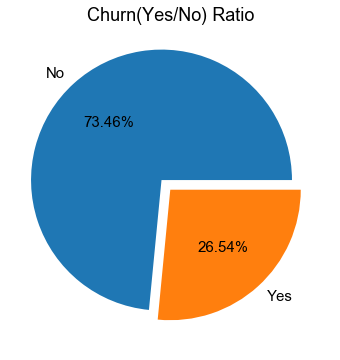

In [335]:
# 数据可视化
# 查看流失用户数量和占比
plt.rcParams['figure.figsize']=6,6
plt.pie(data['Churn'].value_counts(),labels=data['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

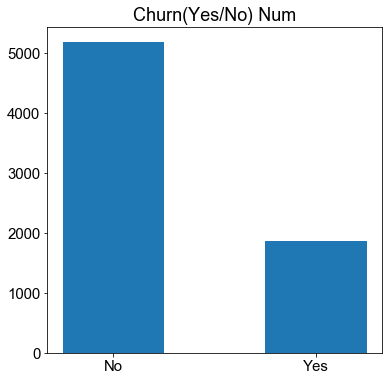

In [336]:
# 用户流失柱状图：
churnDf=data['Churn'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Churn']
plt.bar(x,y,width = 0.5)
plt.title('Churn(Yes/No) Num')
plt.show()

   SeniorCitizen Churn  percentage of customers
0              0    No                 0.640068
1              0   Yes                 0.197785
2              1    No                 0.094562
3              1   Yes                 0.067585


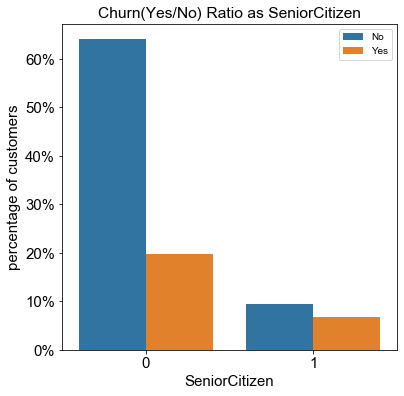

   gender Churn  percentage of customers
0  Female    No                 0.361920
1  Female   Yes                 0.133324
2    Male    No                 0.372710
3    Male   Yes                 0.132046


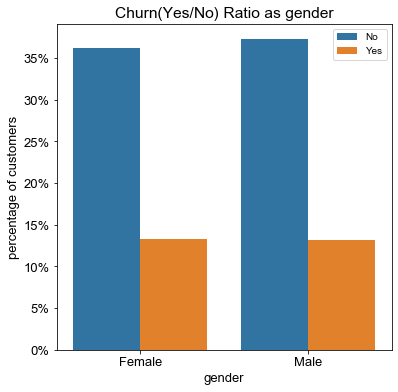

In [337]:
# 计算老少，男女的用户流失比例：
def barplot_percentages(feature,orient='v',axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = (data.groupby(feature)["Churn"].value_counts()/len(data)).to_frame()
    g.rename(columns={"Churn":axis_name},inplace=True)
    g.reset_index(inplace=True)

    print(g)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
        plt.legend(fontsize=10)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.show()
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

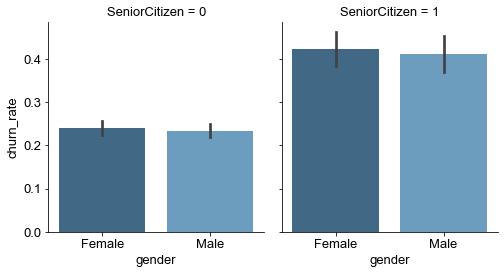

In [338]:
# 按照老年和青年划分下，查看男女流失比例。
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])
plt.rcParams.update({'font.size': 13})
plt.show()

# 小结：

# 用户流失与性别基本无关；
# 年老用户流失占显著高于年轻用户。

  Dependents Churn  percentage of customers
0         No    No                 0.481329
1         No   Yes                 0.219083
2        Yes    No                 0.253301
3        Yes   Yes                 0.046287


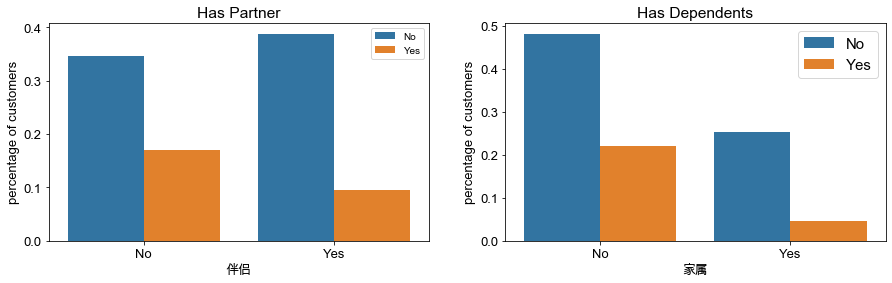

In [339]:
fig, axis = plt.subplots(1, 2, figsize=(15,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (data.groupby('Partner')["Churn"].value_counts()/len(data)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)
ax1.set_xlabel('伴侣')


# Plot Dependents column
gp_dep = (data.groupby('Dependents')["Churn"].value_counts()/len(data)).to_frame()
# print(gp_dep)
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
# print(gp_dep)
gp_dep.reset_index(inplace=True)
print(gp_dep)

ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
ax2.set_xlabel('家属')

# 解决中文显示问题
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#设置字体大小
plt.rcParams.update({'font.size': 15})
ax2.legend(fontsize=15)

#设置
plt.show()

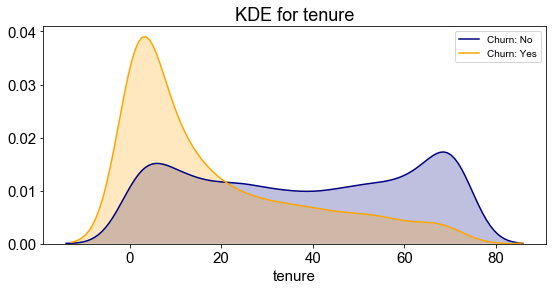

In [340]:
# Kernel density estimaton核密度估计
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 15})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
plt.show()

  InternetService Churn  percentage of customers
0             DSL    No                 0.278574
1             DSL   Yes                 0.065171
2     Fiber optic    No                 0.255431
3     Fiber optic   Yes                 0.184154
4              No    No                 0.200625
5              No   Yes                 0.016044


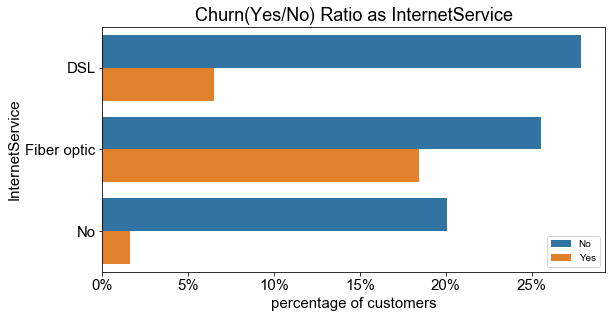

In [341]:
# 按照多线特征绘制：

plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

      MultipleLines Churn  percentage of customers
0                No    No                 0.360784
1                No   Yes                 0.120545
2  No phone service    No                 0.072696
3  No phone service   Yes                 0.024137
4               Yes    No                 0.301150
5               Yes   Yes                 0.120687


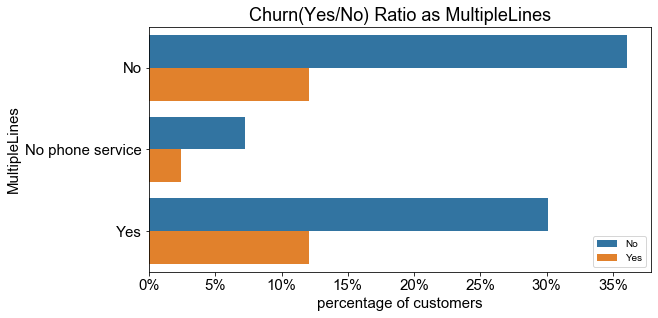

In [342]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient="h")

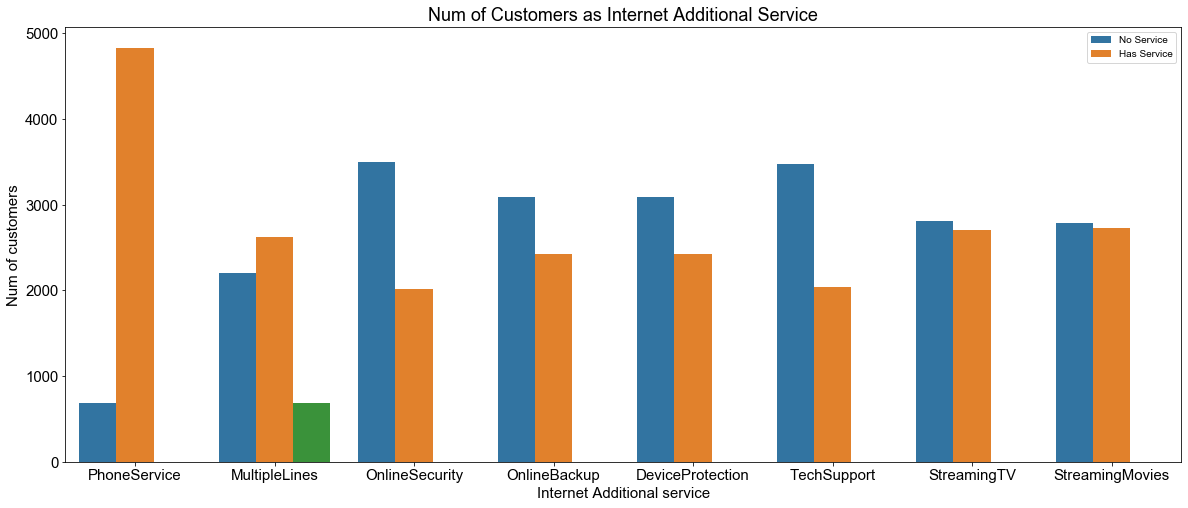

In [343]:
cols = ["PhoneService","MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols])
df1.rename(columns={'value': 'Has service'},inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size':15})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=10)
plt.title('Num of Customers as Internet Additional Service')
plt.show()

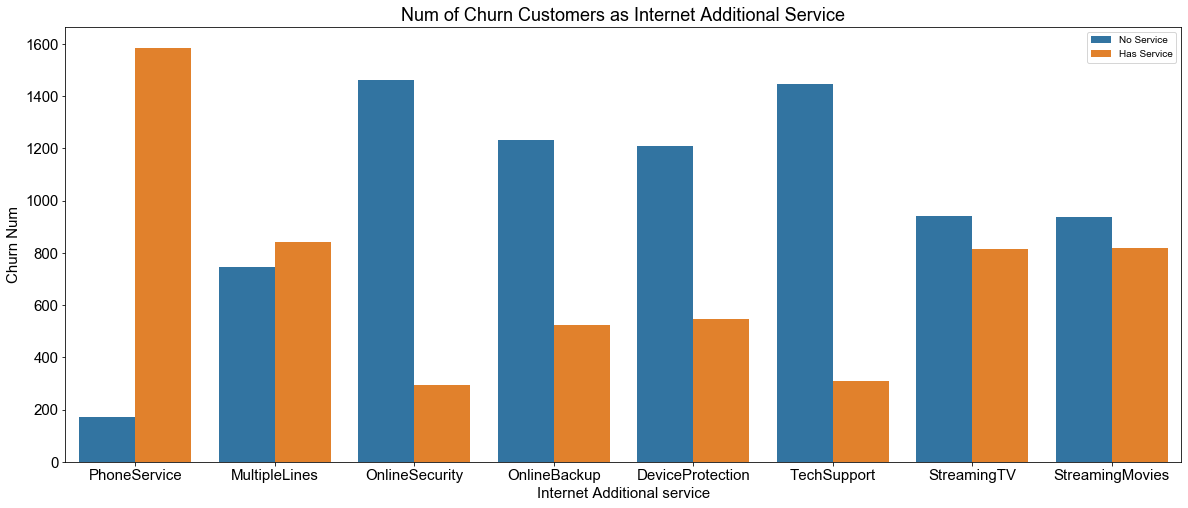

In [344]:
plt.figure(figsize=(20, 8))
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Internet Additional service', ylabel='Churn Num')
plt.rcParams.update({'font.size':15})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=10)
plt.title('Num of Churn Customers as Internet Additional Service')
plt.show()

               PaymentMethod Churn  percentage of customers
0  Bank transfer (automatic)    No                 0.182593
1  Bank transfer (automatic)   Yes                 0.036632
2    Credit card (automatic)    No                 0.183161
3    Credit card (automatic)   Yes                 0.032941
4           Electronic check    No                 0.183729
5           Electronic check   Yes                 0.152066
6               Mailed check    No                 0.185148
7               Mailed check   Yes                 0.043731


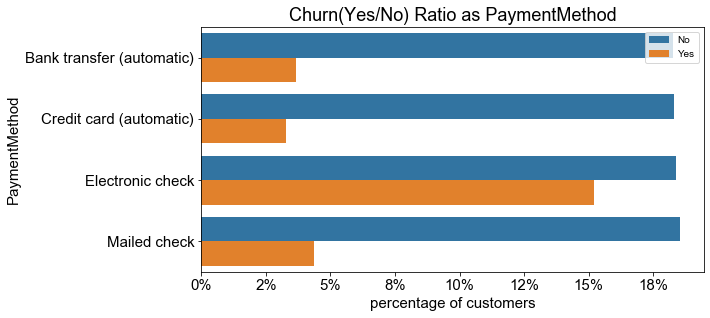

In [345]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod",orient='h')

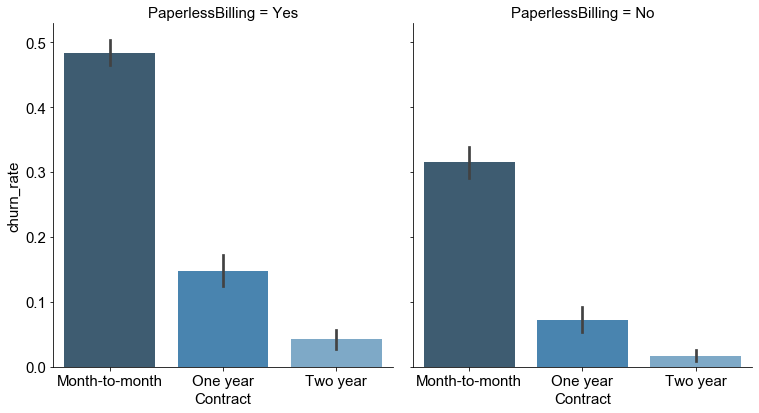

In [346]:
g = sns.FacetGrid(data, col="PaperlessBilling", height=6, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.rcParams.update({'font.size':18})
plt.show()

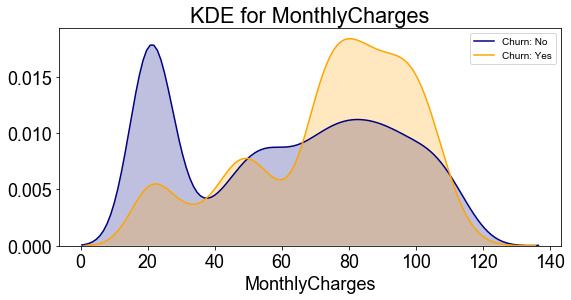

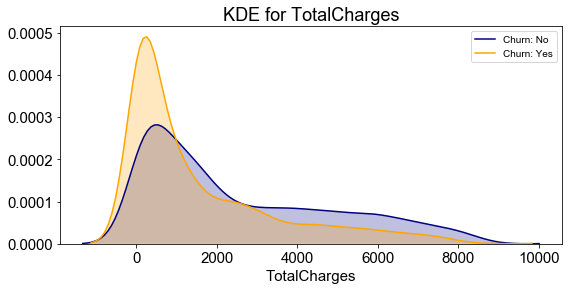

In [347]:
kdeplot('MonthlyCharges','MonthlyCharges')
kdeplot('TotalCharges','TotalCharges')
#设置字体大小
# 解决中文显示问题
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#设置字体大小
plt.rcParams.update({'font.size': 15})
plt.legend(fontsize=10)
plt.show()

In [348]:
def charge_to_level(charge):
    if charge<=da.loc["25%"]:
        return "低消费"
    elif charge<=da.loc["50%"] and charge>da.loc["25%"]:
        return "中低消费"
    elif charge<=da.loc["75%"] and charge>da.loc["50%"]:
        return "中高消费"
    else:
        return "高消费"
da=data["MonthlyCharges"].describe()
data["level_MonthlyCharges"] = data["MonthlyCharges"].apply(charge_to_level)
da=data["TotalCharges"].describe()
data["level_TotalCharges"] = data["TotalCharges"].apply(charge_to_level)


display(data["level_MonthlyCharges"].value_counts())
data.sample(5)


中低消费    1766
低消费     1762
高消费     1758
中高消费    1757
Name: level_MonthlyCharges, dtype: int64

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate,level_MonthlyCharges,level_TotalCharges
2499,6061-GWWAV,Male,0,No,Yes,41,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,70.20,2894.55,No,0,中低消费,中高消费
3967,5914-GXMDA,Female,0,Yes,No,32,Yes,No,No,No internet service,...,No internet service,One year,No,Mailed check,19.30,593.20,No,0,低消费,中低消费
5231,1075-BGWOH,Male,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,98.75,1587.55,Yes,1,高消费,中高消费
5844,2905-KFQUV,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No,0,中高消费,低消费
4674,0980-FEXWF,Male,0,Yes,Yes,26,Yes,No,DSL,No,...,No,One year,No,Mailed check,50.35,1285.80,No,0,中低消费,中低消费


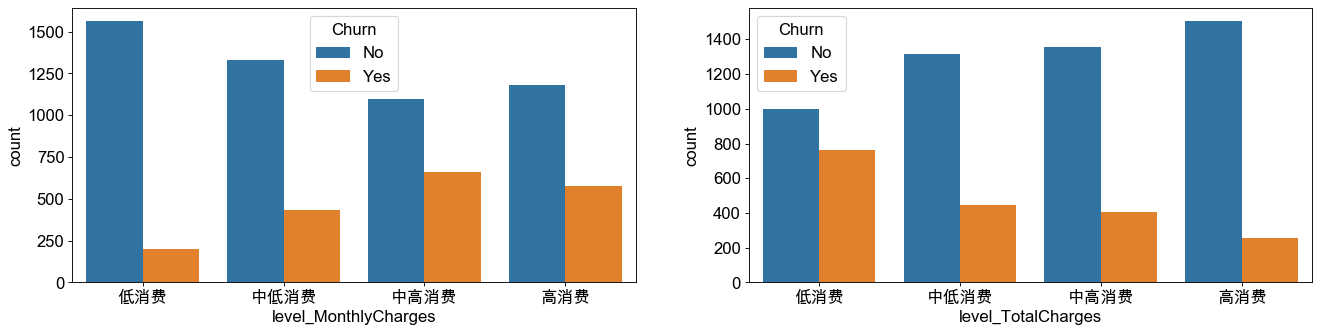

In [349]:
fig=plt.figure(figsize=(20,10),dpi=80)
# 子图1
fig.add_subplot(2,2,1)
sns.countplot(x="level_MonthlyCharges",hue="Churn",data=data,order=["低消费","中低消费","中高消费","高消费"])

# 子图2
fig.add_subplot(2,2,2)
sns.countplot(x="level_TotalCharges",hue="Churn",data=data,order=["低消费","中低消费","中高消费","高消费"])
plt.show()

In [350]:
# 丢掉customerID特征
customerID=data['customerID']
data.drop(['customerID'],axis=1, inplace=True)

In [351]:
# 对离散特征进行one—hot编码
cateCols = [c for c in data.columns if data[c].dtype == 'object' or c == 'SeniorCitizen']
dfCate = data[cateCols].copy()
dfCate.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,level_MonthlyCharges,level_TotalCharges
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,低消费,低消费
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,中低消费,中高消费
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,中低消费,低消费


In [352]:
# 绘制关联图 
# plt.figure(figsize=(16,8))
# dfCate.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
# plt.show()

In [353]:
# 特征选择
dropFea = ['gender','PhoneService',
#            'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
#            'DeviceProtection_No internet service', 'TechSupport_No internet service',
#            'StreamingTV_No internet service', 'StreamingMovies_No internet service',
           'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection','TechSupport',
           'StreamingTV', 'StreamingMovies',
           ]
dfCate.drop(dropFea, inplace=True, axis =1) 
# 最后一列是作为标识
target = dfCate['Churn'].values
#列表：特征和1个标识
columns = dfCate.columns.tolist()

In [354]:
# 构造训练数据集和测试数据集。
# 列表：特征
columns.remove('Churn')
# 含有特征的DataFrame
features = dfCate[columns].values
# 30% 作为测试集，其余作为训练集
# random_state = 1表示重复试验随机得到的数据集始终不变
# stratify = target 表示按标识的类别，作为训练数据集、测试数据集内部的分配比例
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)

In [355]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN分类模型
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 评估指标 --正确率 精准率 召回率 F1调和平均值

# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    AdaBoostClassifier(random_state = 1),   
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'adaboostclassifier',
]
# 分类器参数
#注意分类器的参数，字典键的格式，GridSearchCV对调优的参数格式是"分类器名"+"__"+"参数名"
classifier_param_grid = [
            {'svc__C':[0.1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':range(1,11)} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
            {'adaboostclassifier__n_estimators':[70,80,90]}
]

In [356]:
# 对具体的分类器进行 GridSearchCV 参数调优
from sklearn.model_selection import GridSearchCV #网格交叉验证
from sklearn.pipeline import Pipeline #引入流水线
from sklearn.preprocessing import StandardScaler, MinMaxScaler # StandardScaler：均值标准差标准化 # MinMaxScaler：最小最大值标准化
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# 对具体的分类器进行 GridSearchCV 参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv=3, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数： %0.4lf" %search.best_score_)
    #采用predict函数（特征是测试数据集）来预测标识，预测使用的参数是上一步得到的最优参数
    predict_y = gridsearch.predict(test_x)
    print(" 准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    #采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
            #('scaler', StandardScaler()),
            #('pca',PCA),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


ValueError: could not convert string to float: 'No'